In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\iluha\Desktop\Air\Датасет №1_Airline Passenger Satisfaction_mod (2).csv")


df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103910 entries, 0 to 103909
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103910 non-null  int64  
 1   Gender                             103858 non-null  object 
 2   Customer Type                      103910 non-null  object 
 3   Age                                103910 non-null  int64  
 4   Type of Travel                     103910 non-null  object 
 5   Class                              103910 non-null  object 
 6   Flight Distance                    103910 non-null  int64  
 7   Inflight wifi service              103910 non-null  int64  
 8   Departure/Arrival time convenient  103910 non-null  int64  
 9   Ease of Online booking             103792 non-null  float64
 10  Gate location                      103910 non-null  int64  
 11  Food and drink                     1039

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103910.000000,103910.000000,103910.000000,103910.000000,103910.000000,103792.000000,103910.000000,103910.000000,103910.000000,103910.000000,103910.000000,103910.000000,100595.000000,103400.000000,103910.000000,103910.000000,103910.000000,103910.000000,103600.000000
mean,64923.911337,39.370128,1189.425002,2.729641,3.060312,2.756889,2.976903,3.202098,3.250303,3.439371,3.358146,3.382360,3.351180,3.631712,3.304292,3.640429,3.286334,14.816360,15.179585
std,37464.124793,15.134398,997.126446,1.327853,1.525075,1.398865,1.277615,1.329549,1.349553,1.319097,1.333014,1.288352,1.315518,1.180899,1.265380,1.175659,1.312273,38.231844,38.700051
min,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64855.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.750000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,98.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [3]:
rating_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
               'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
               'Checkin service', 'Inflight service', 'Cleanliness']

for col in rating_columns:
    if col in df.columns and df[col].isnull().any():
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

if 'Arrival Delay in Minutes' in df.columns:
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'])

In [4]:
df['Class'] = df['Class'].replace({
    'Econom': 'Eco',
    'Busines': 'Business'
})

df['Customer Type'] = df['Customer Type'].replace({
    'disloyal Customer': 'Disloyal Customer'
}) # Круто сгенерированы базы данные с маленькими буквами, пришлось замену делать

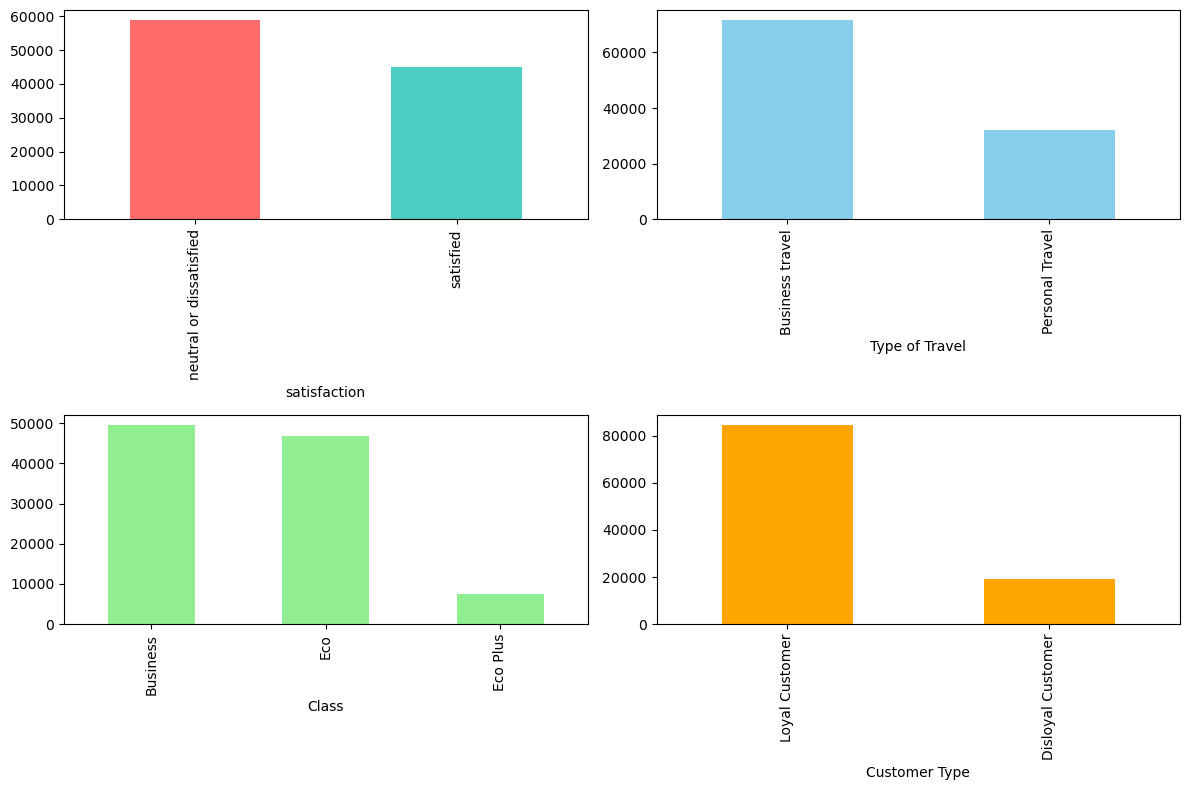

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) 

df['satisfaction'].value_counts().plot(kind='bar', ax=axes[0,0], color=['#ff6b6b', '#4ecdc4'])
df['Type of Travel'].value_counts().plot(kind='bar', ax=axes[0,1], color='skyblue')
df['Class'].value_counts().plot(kind='bar', ax=axes[1,0], color='lightgreen')
df['Customer Type'].value_counts().plot(kind='bar', ax=axes[1,1], color='orange')

plt.tight_layout()
plt.show() 

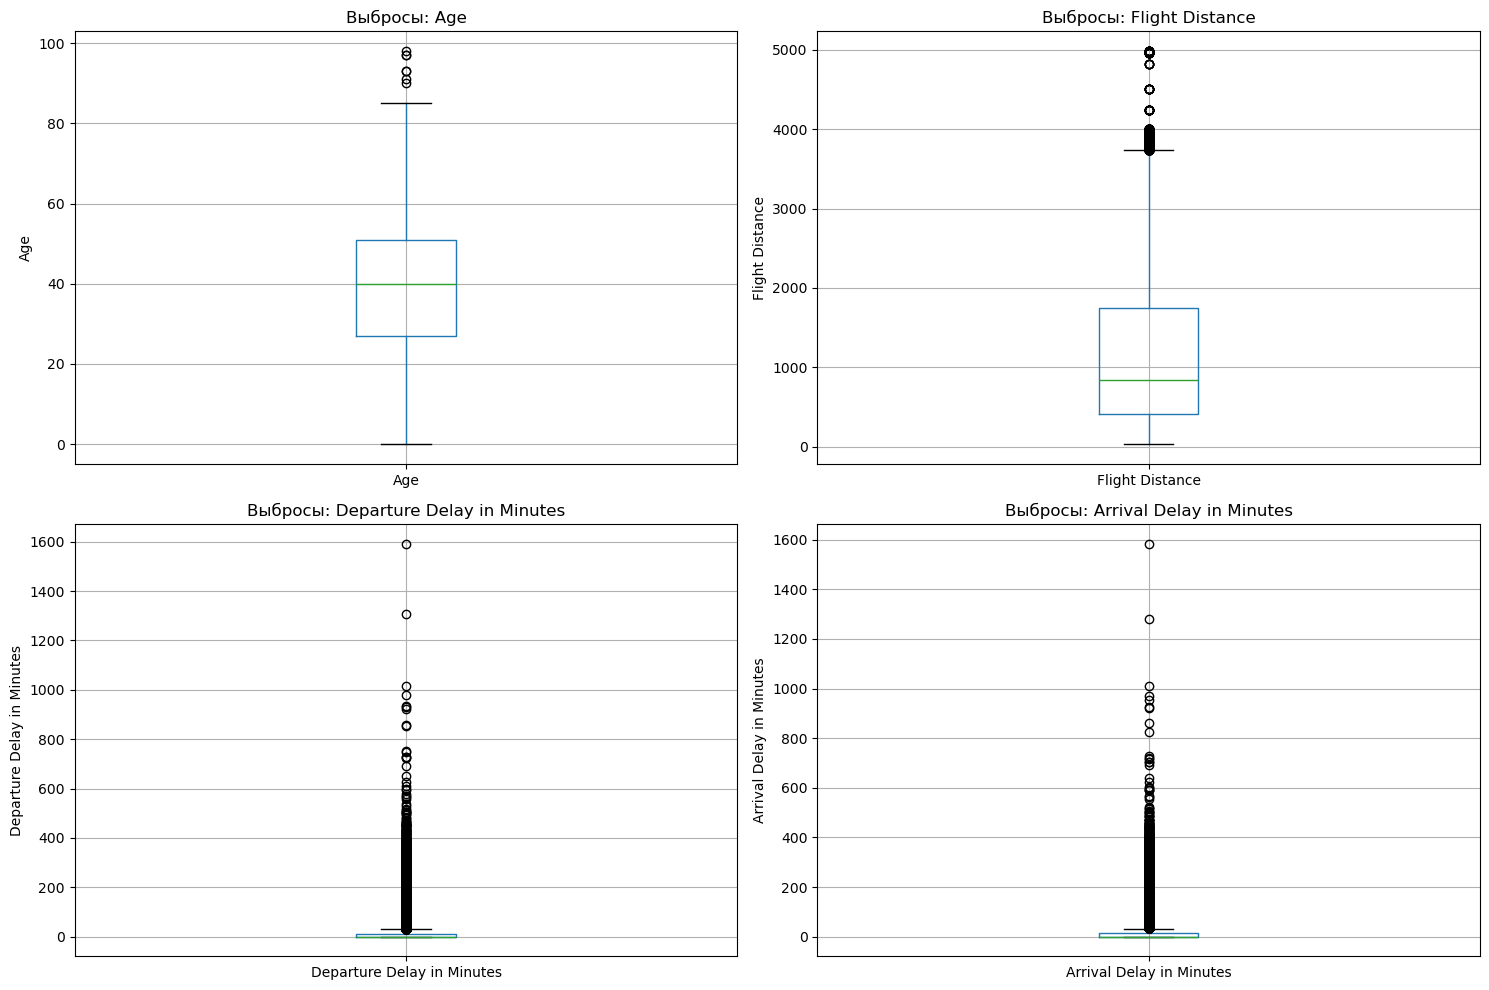

In [6]:
numeric_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    ax = axes[i//2, i%2]
    
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'Выбросы: {col}')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df['overall_service'] = df[rating_columns].mean(axis=1)

In [ ]:
comfort_features = ['Seat comfort', 'Leg room service', 'Cleanliness']
df['comfort_score'] = df[comfort_features].mean(axis=1)

In [ ]:
entertainment_features = ['Food and drink', 'Inflight entertainment']
df['entertainment_score'] = df[entertainment_features].mean(axis=1)

In [ ]:
df['total_delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']
df['has_delay'] = (df['total_delay'] > 0).astype(int)
df['delay_ratio'] = df['Arrival Delay in Minutes'] / (df['Departure Delay in Minutes'] + 1)

In [ ]:
def categories_distance(distance):
    if distance <= 500:
        return 'short'
    elif distance <= 1500:
        return 'medium'
    else:
        return 'long'

df['distance_category'] = df['Flight Distance'].apply(categories_distance)

In [ ]:
def categories_age(age):
    if age < 18:
        return 'child'
    elif age < 30:
        return 'young_adult'
    elif age < 50:
        return 'adult'
    elif age < 65:
        return 'senior'
    else:
        return 'elderly'

df['age_group'] = df['Age'].apply(categories_age)


In [7]:
df['low_ratings_count'] = (df[rating_columns] <= 2).sum(axis=1)
df['high_ratings_count'] = (df[rating_columns] >= 4).sum(axis=1)

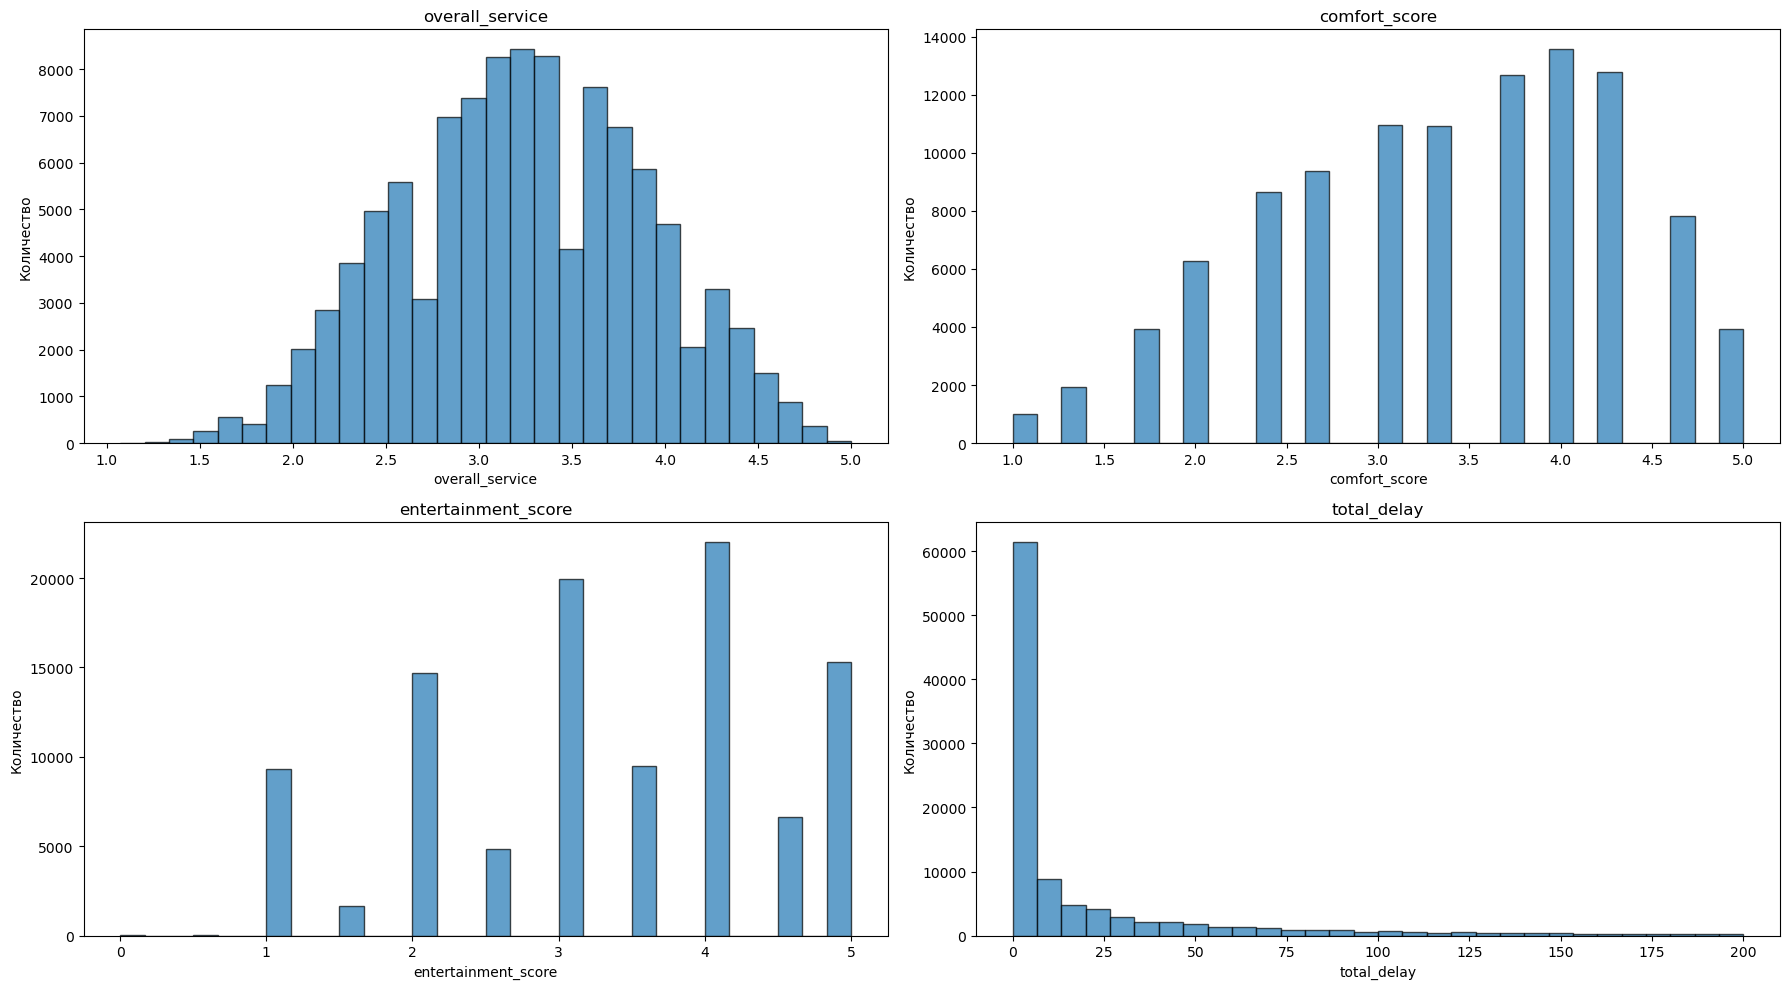

In [16]:
composite_features = ['overall_service', 'comfort_score', 'entertainment_score', 
                     'total_delay']

plt.figure(figsize=(18, 10))

for i, feature in enumerate(composite_features):
    plt.subplot(2, 2, i+1)  
    
    if feature == 'total_delay':
        data_to_plot = df[df[feature] <= 200][feature]
    else:
        data_to_plot = df[feature]
    
    plt.hist(data_to_plot, bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'{feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

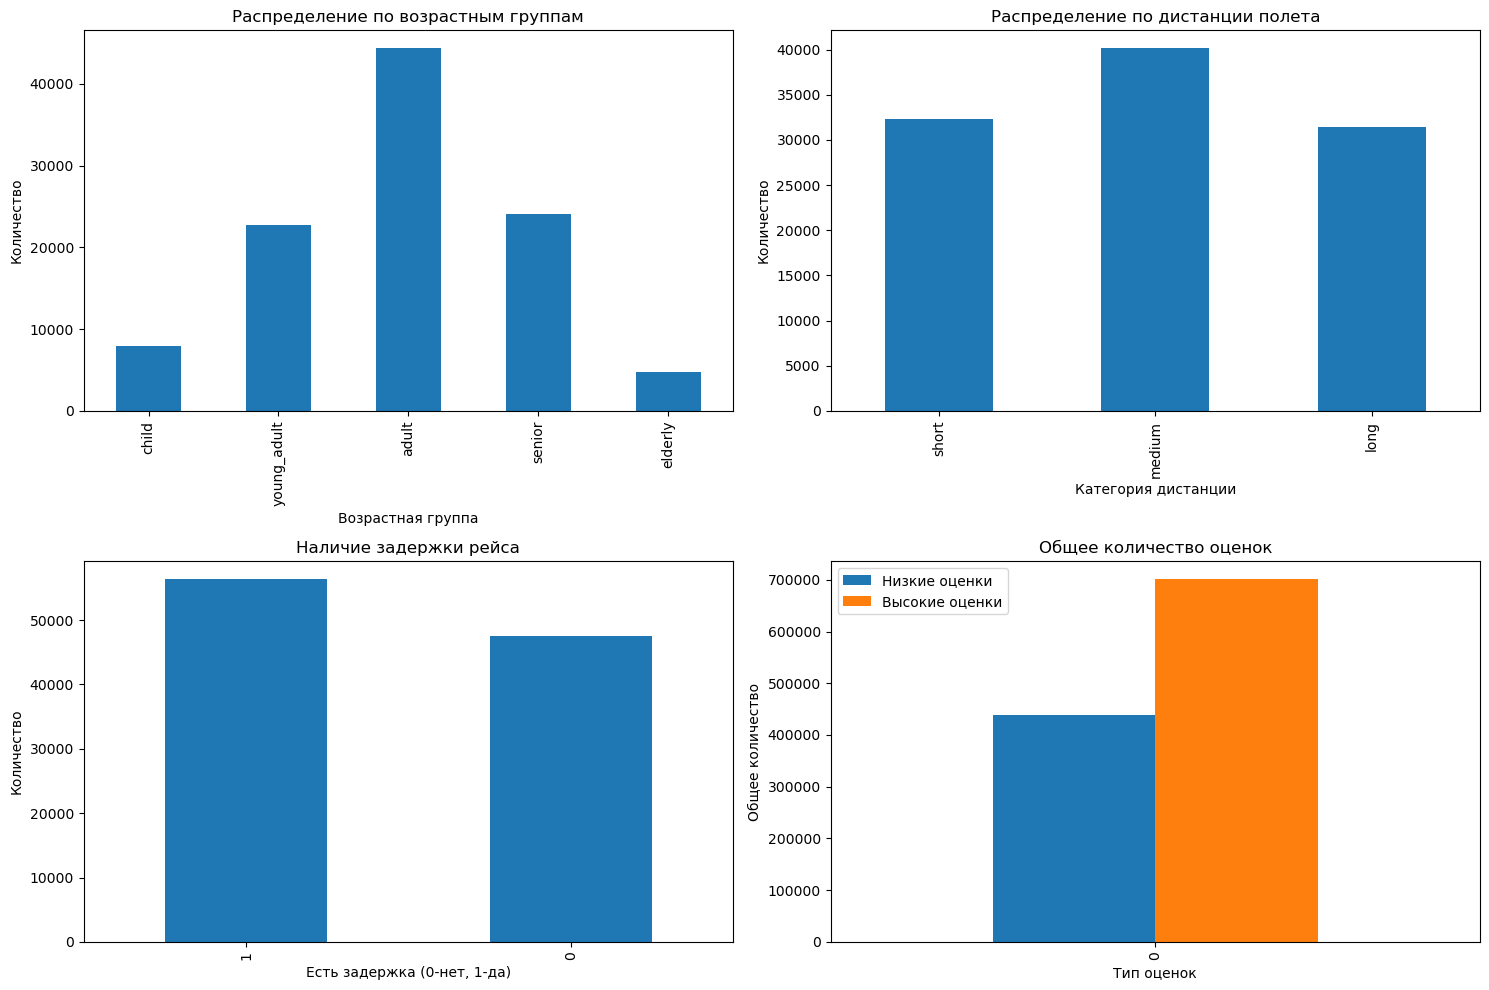

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

age_order = ['child', 'young_adult', 'adult', 'senior', 'elderly']
df['age_group'].value_counts().reindex(age_order).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Распределение по возрастным группам')
axes[0,0].set_xlabel('Возрастная группа')
axes[0,0].set_ylabel('Количество')


distance_order = ['short', 'medium', 'long']
df['distance_category'].value_counts().reindex(distance_order).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Распределение по дистанции полета')
axes[0,1].set_xlabel('Категория дистанции')
axes[0,1].set_ylabel('Количество')


df['has_delay'].value_counts().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Наличие задержки рейса')
axes[1,0].set_xlabel('Есть задержка (0-нет, 1-да)')
axes[1,0].set_ylabel('Количество')


rating_comparison = pd.DataFrame({
    'low_ratings': [df['low_ratings_count'].sum()], 
    'high_ratings': [df['high_ratings_count'].sum()] 
})

rating_comparison.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Общее количество оценок')  
axes[1,1].set_xlabel('Тип оценок')
axes[1,1].set_ylabel('Общее количество')
axes[1,1].legend(['Низкие оценки', 'Высокие оценки'])

plt.tight_layout()
plt.show()

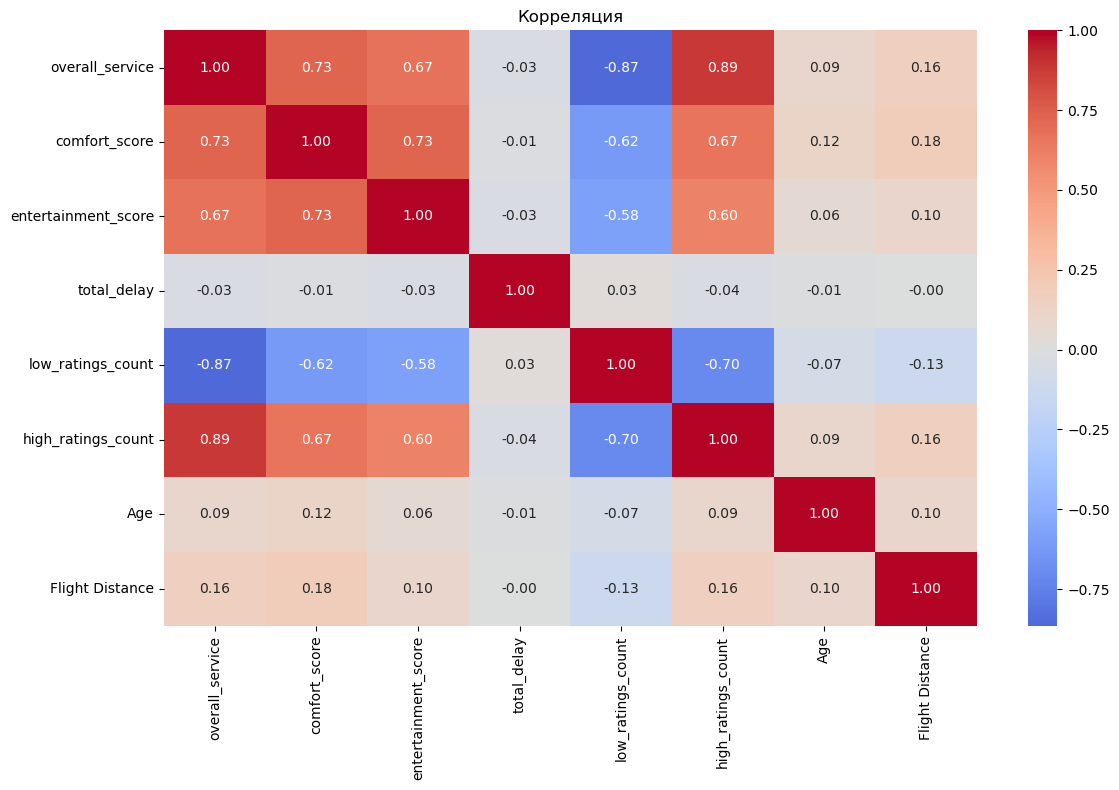

In [15]:
composite_numeric = ['overall_service', 'comfort_score', 'entertainment_score',
                    'total_delay', 'low_ratings_count', 'high_ratings_count',
                    'Age', 'Flight Distance']

plt.figure(figsize=(12, 8))
corr_matrix = df[composite_numeric].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляция')
plt.tight_layout()
plt.show()

In [11]:
columns_to_drop = ['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 
                  'satisfaction', 'Date', 'age_group', 'distance_category']

df_ml = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [12]:
df_ml.to_excel(r'C:\Users\iluha\Desktop\Air/The Table.xlsx', index=False)